# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

#### Data Problem Definition for Identifying Key Drivers of Used Car Prices

The goal is to build a predictive model to understand what factors influence used car prices by using the CRISP-DM framework. Identifying key drivers of used car prices can be reframed as a supervised learning problem where the target variable is the price of a used car. Using historical data that includes features such as vehicle age, odometer, condition, manufacturer, fuel type, cylinders, size, transmission type and title status. This requires data preprocessing and exploratory data analysis (EDA) to identify the most influential factors before applying regression or machine learning techniques to measure how these key factors influence used car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Steps to Understand the Dataset and Identify Issues

1. Import the necessary libraries and load the dataset into a Pandas DataFrame.
2. Understand the datastructure
   - Identify data types (numeric, categorical, text, etc.).
   - Highlight missing or null values.
   - Shows basic statistics like mean, median, min, max, and standard deviation.
3. Check for missing or null values
4. Identify duplicates
5. Understand relationships between variables





### Import Module

In [5]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams["figure.figsize"] = (15,9)
plt.style.use("fivethirtyeight")

# prepare data
from sklearn.model_selection import train_test_split

# model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# %matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge



from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

print("All modules are loaded")

All modules are loaded


### Load and read cars data


In [6]:
df = pd.read_csv('vehicles.csv')

In [7]:
# show first 5 rows of the data
df.head(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [8]:
# determine the shape of the dataframe
df.shape

(426880, 18)

In [9]:
# check data types of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Cleaning 

In [10]:
# Drop unique identifiers
df = df.drop(['id', 'region', 'VIN'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


In [11]:
# identify missiing values 
missing_values = df.isna().sum().sort_values(ascending=False)
missing_percentage = (df.isna().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_df)


              Missing Values  Percentage
condition             174104   40.785232
cylinders             177678   41.622470
drive                 130567   30.586347
fuel                    3013    0.705819
manufacturer           17646    4.133714
model                   5277    1.236179
odometer                4400    1.030735
paint_color           130203   30.501078
price                      0    0.000000
size                  306361   71.767476
state                      0    0.000000
title_status            8242    1.930753
transmission            2556    0.598763
type                   92858   21.752717
year                    1205    0.282281


### Handling Missing Values

In [12]:
# Handling missing values for numerical columns
df['odometer'] = df['odometer'].fillna(df['odometer'].median())

# Handling missing values for categorical columns
categ_cols = ['year', 'manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'condition', 'cylinders']
for col in categ_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill with most frequent category

# Handling highly missing columns (drop na with >50% missing values)
df = df.dropna()

# Convert 'year' to car age
df['car_age'] = 2025 - df['year']
df.drop(columns=['year'], inplace=True)

# Verify missing values are handled
print(df.isna().sum())

price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
car_age         0
dtype: int64


In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,120519.0,NaN,NaN,NaN,89696.535725,15573070.831266,0.0,4500.0,9495.0,18500.0,3736928711.0
manufacturer,120519,41,ford,26260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,120519,13239,f-150,4461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,120519,6,good,55059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,120519,8,6 cylinders,49052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,120519,5,gas,108884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,120519.0,NaN,NaN,NaN,117336.351048,245180.424215,0.0,63305.5,104556.0,149000.0,10000000.0
title_status,120519,6,clean,114547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,120519,3,automatic,110241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive,120519,3,4wd,54741,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Duplicate check

In [14]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")


Total duplicate rows: 25787


In [15]:
# remove duplicates 
df1 = df[~df.duplicated()].copy()

In [16]:
# verify if the duplicates are removed 
df1.duplicated().sum()

0

In [17]:
cars = df1.copy()
cars.shape

(94732, 15)

## EDA

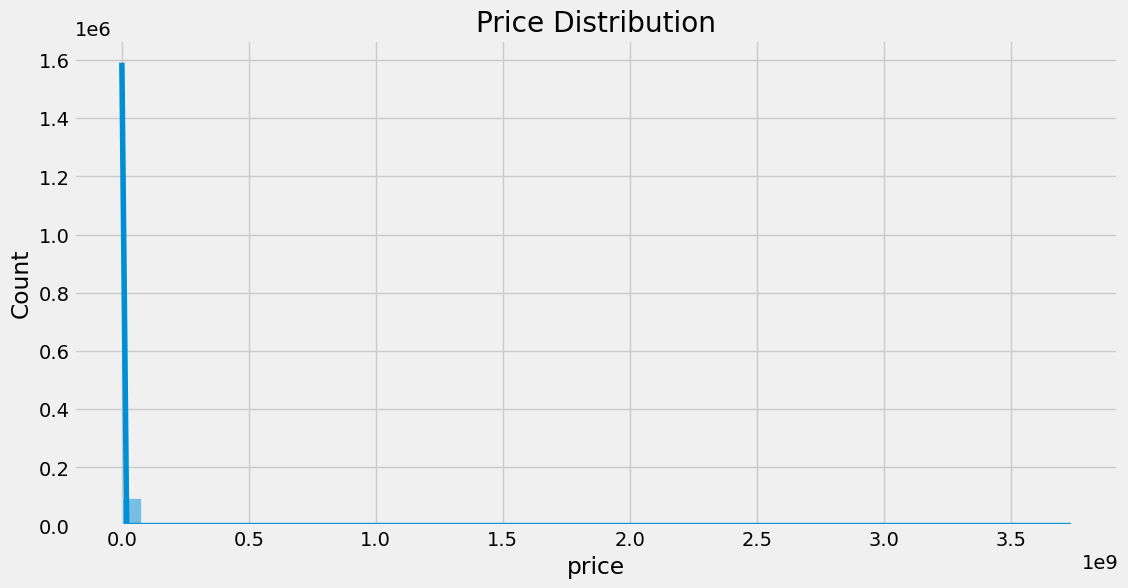

In [18]:
# Plot the price distribution
plt.figure(figsize=(12,6))
sns.histplot(cars['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

### As we she that the price dsistribution is right skewed so it is better to trnasform the price into log

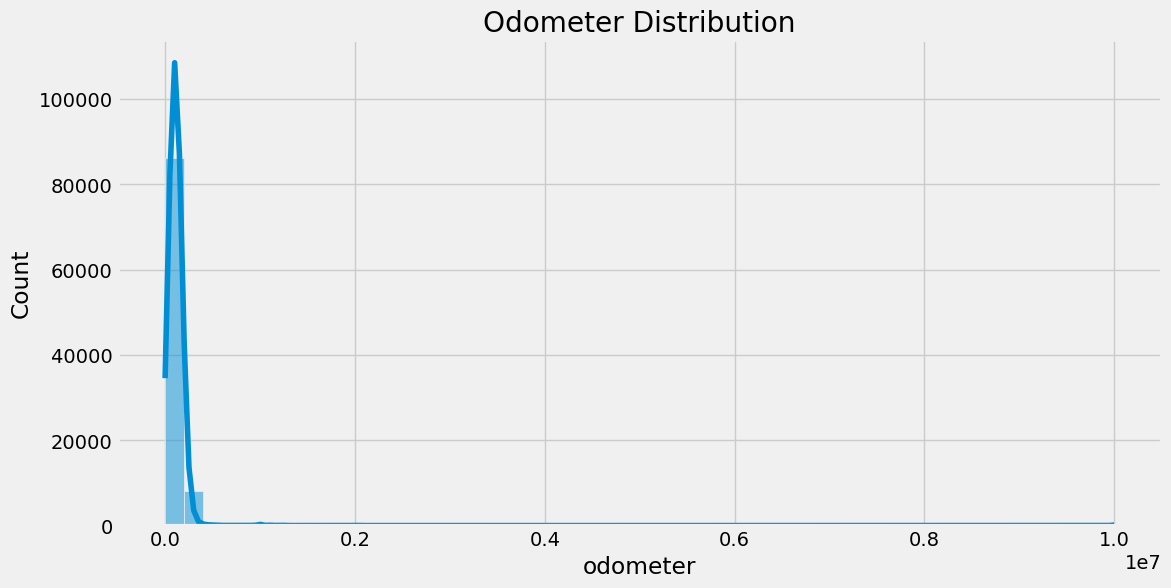

In [19]:
# Plot the odometer distribution
plt.figure(figsize=(12,6))
sns.histplot(cars['odometer'], bins=50, kde=True)
plt.title("Odometer Distribution")
plt.show()

### As we she that the odometer dsistribution is also right skewed so it is better to trnasform the price into log

### Log Transformation of Price and Odometer Columns


In [20]:
# Apply log transformation to the price column
cars['log_price'] = np.log1p(cars['price'])

# Apply log transformation to the odometer column
cars['log_odometer'] = np.log1p(cars['odometer'])


In [21]:
# # Correlation matrix for numerical features
# corr_matrix = cars.select_dtypes(include=['int64', 'float64']).corr()
# corr_matrix['price'].sort_values(ascending=False)
# # Correlation Heatmap (for numerical variables)

# correlation_matrix = cars.select_dtypes(include=['int64', 'float64']).corr()

# plt.figure(figsize=(10,6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()


### Unviaraiate Analysis of Target Column (price)

#### 1. Histogram with KDE (Kernel Density Estimate)

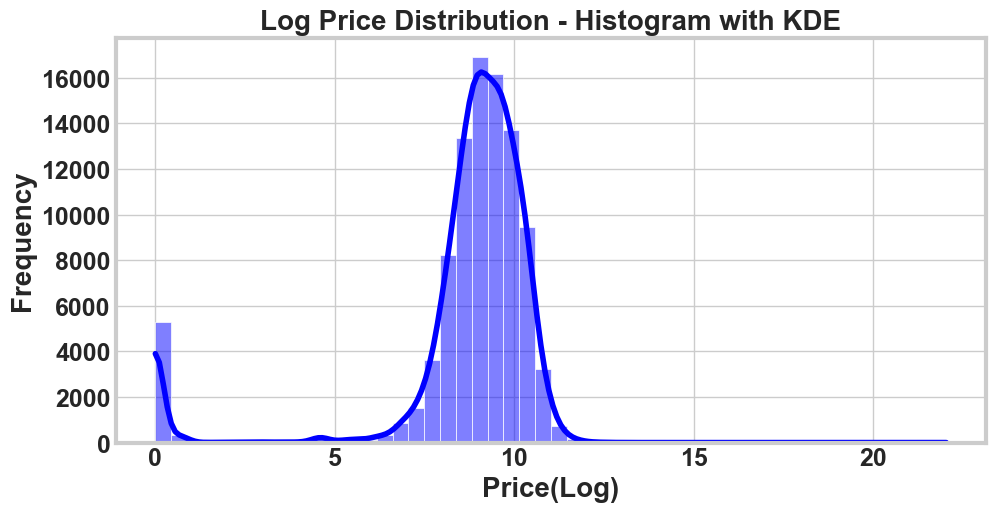

In [22]:
# Set style for seaborn
sns.set_style("whitegrid")

#Histogram with KDE 
plt.figure(figsize=(10, 5))
sns.histplot(cars['log_price'], bins=50, kde=True, color='blue')
plt.title('Log Price Distribution - Histogram with KDE', fontsize=20, fontweight ='bold')
plt.xlabel('Price(Log)', fontsize=20, fontweight ='bold')
plt.ylabel('Frequency', fontsize=20, fontweight ='bold')
plt.xticks(fontsize = 18, fontweight='bold')
plt.yticks(fontsize = 18, fontweight='bold')
plt.show()

#### Interpretion of Log Price distribution Histogram: 
The values at the end of left tail of the distibution seems ot be outlier. We will handle outliers later. 

#### 2. Boxplot (Identifying Outliers)

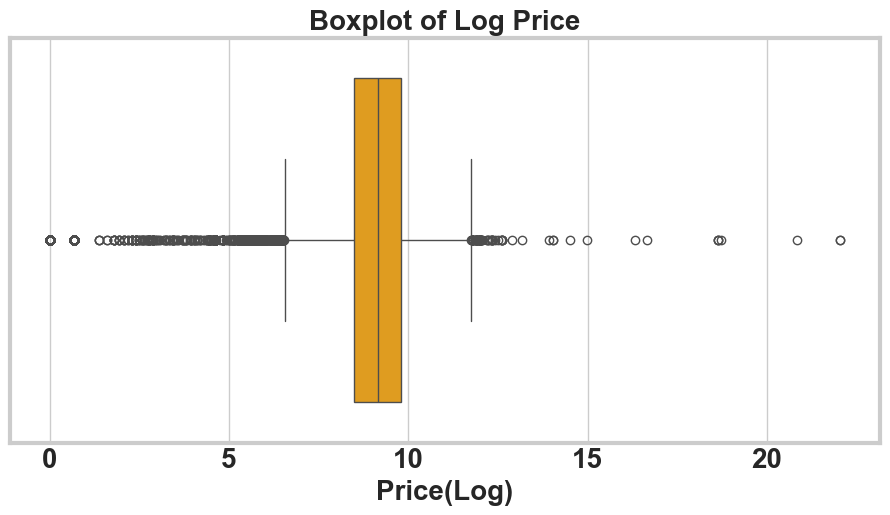

In [23]:
# Boxplot of price column
plt.figure(figsize=(10, 5))
sns.boxplot(x=cars['log_price'], color='orange')
plt.title('Boxplot of Log Price', fontsize=20, fontweight ='bold')
plt.xlabel('Price(Log)', fontsize=20, fontweight ='bold')
plt.xticks(fontsize=20, fontweight ='bold')
plt.show()


#### 3. Violin Plot (Distribution with Density)

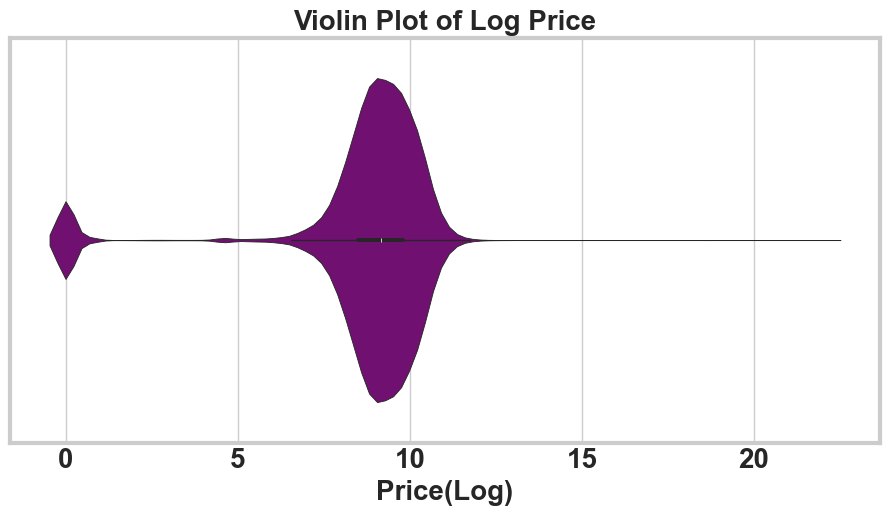

In [24]:
# Violin plot 
plt.figure(figsize=(10, 5))
sns.violinplot(x=cars['log_price'], color='purple')
plt.title('Violin Plot of Log Price', fontsize=20, fontweight ='bold')
plt.xlabel('Price(Log)', fontsize=20, fontweight ='bold')
plt.xticks(fontsize=20, fontweight ='bold')
plt.show()

#### All the above plots shows the outliers in the data. We will handle the outliers in next steps.

#### **Outlier Detection using IQR Method**

In [25]:
# Outlier detection
#define 1st quartile and third quartile
Q1 = cars['log_price'].quantile(0.25)  # First quartile
Q3 = cars['log_price'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cars[(cars['log_price'] < lower_bound) | (cars['log_price'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")

# Option 1: Remove outliers
cars_no_outliers = cars[(cars['log_price'] >= lower_bound) & (cars['log_price'] <= upper_bound)]

# Option 2: Cap/Floor outliers to lower and upper bounds
cars_capped = cars.copy()
cars_capped['log_price'] = np.where(cars_capped['log_price'] > upper_bound, upper_bound,
                                  np.where(cars_capped['log_price'] < lower_bound, lower_bound, cars_capped['log_price']))

# Save cleaned data
cars_no_outliers.to_csv("cleaned_no_outliers.csv", index=False)
cars_capped.to_csv("cleaned_capped_outliers.csv", index=False)



Number of Outliers: 6749


In [26]:
cars_no_outliers.shape

(87983, 17)

#### Histogram of Log(Price) After Outlier Treatment

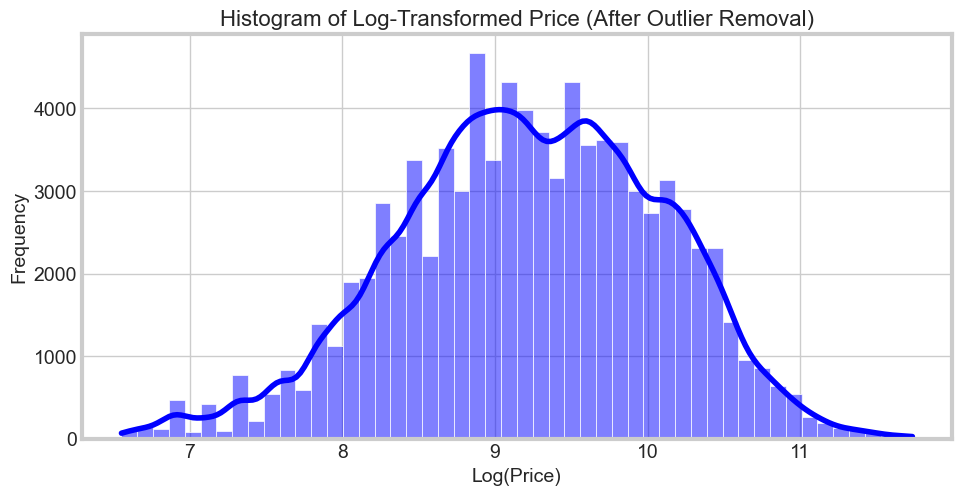

In [27]:
# Plot histogram after outlier treatment
plt.figure(figsize=(10, 5))
sns.histplot(cars_no_outliers['log_price'], bins=50, kde=True, color='blue')
plt.title("Histogram of Log-Transformed Price (After Outlier Removal)", fontsize=16)
plt.xlabel("Log(Price)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()


#### Boxplot of Log(Price) After Outlier Treatment

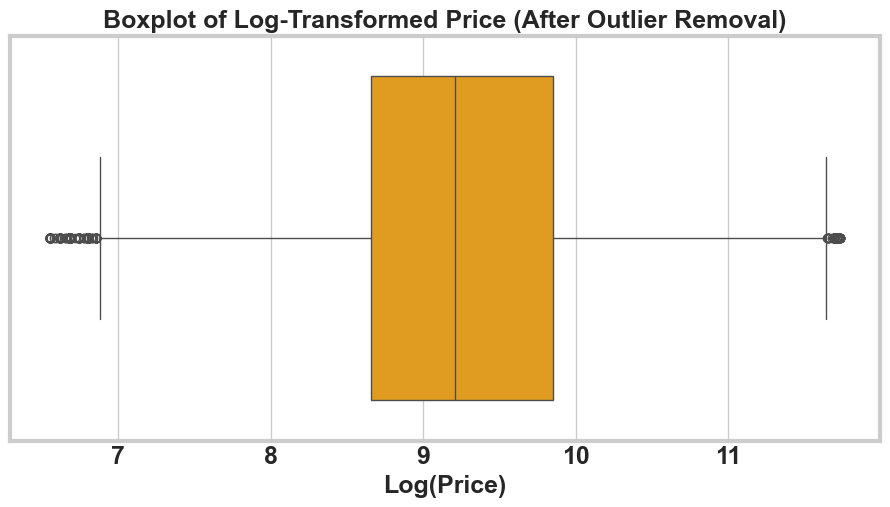

In [28]:
# Box Plot  after outlier treatment

plt.figure(figsize=(10, 5))
sns.boxplot(x=cars_no_outliers['log_price'], color='orange')
plt.title("Boxplot of Log-Transformed Price (After Outlier Removal)", fontsize=18, fontweight = 'bold')
plt.xlabel("Log(Price)", fontsize=18, fontweight = 'bold')
plt.xticks(fontsize=18, fontweight = 'bold')
plt.show()

### Visualize Distributions of Key Numerical Variables: Bivariate Analysis

In [29]:
# Load cleaned dataset after outlier removal
cars1 = pd.read_csv("cleaned_no_outliers.csv")  
cars1.shape


(87983, 17)

#### 1. Scatter Plots: Numeric Features vs. Price

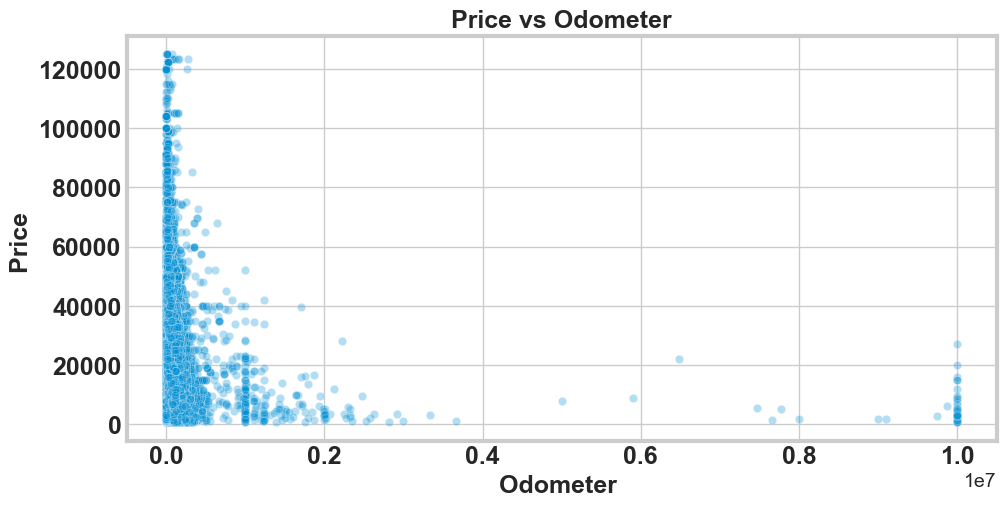

In [30]:
plt.figure(figsize=(10, 5))

# Scatter plot: Price vs Odometer

sns.scatterplot(x=cars1['odometer'], y=cars1['price'], alpha=0.3)
plt.title("Price vs Odometer", fontsize=18, fontweight ='bold')
plt.xlabel("Odometer ", fontsize=18, fontweight ='bold')
plt.ylabel("Price ", fontsize=18, fontweight ='bold')
plt.xticks(fontsize=18, fontweight = 'bold')
plt.yticks(fontsize=18, fontweight = 'bold')
plt.show()


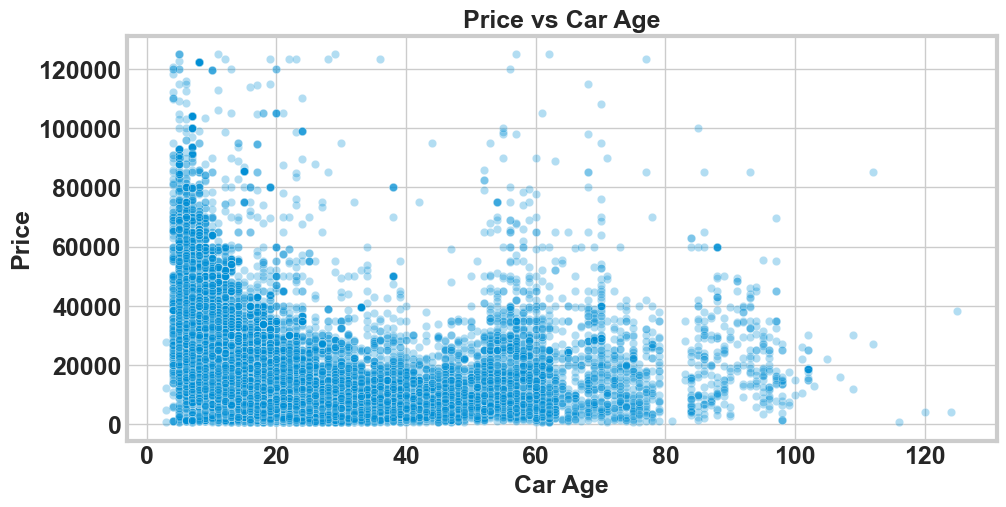

In [31]:
# Scatter plot: Price vs Car age after outlier removal
plt.figure(figsize=(10, 5))

sns.scatterplot(x=cars1['car_age'], y=cars1['price'], alpha=0.3)
plt.title("Price vs Car Age", fontsize=18, fontweight ='bold')
plt.xlabel("Car Age", fontsize=18, fontweight ='bold')
plt.ylabel("Price", fontsize=18, fontweight ='bold')
plt.xticks(fontsize=18, fontweight = 'bold')
plt.yticks(fontsize=18, fontweight = 'bold')
plt.show()


### 2. Box Plots: Categorical Features vs. Price


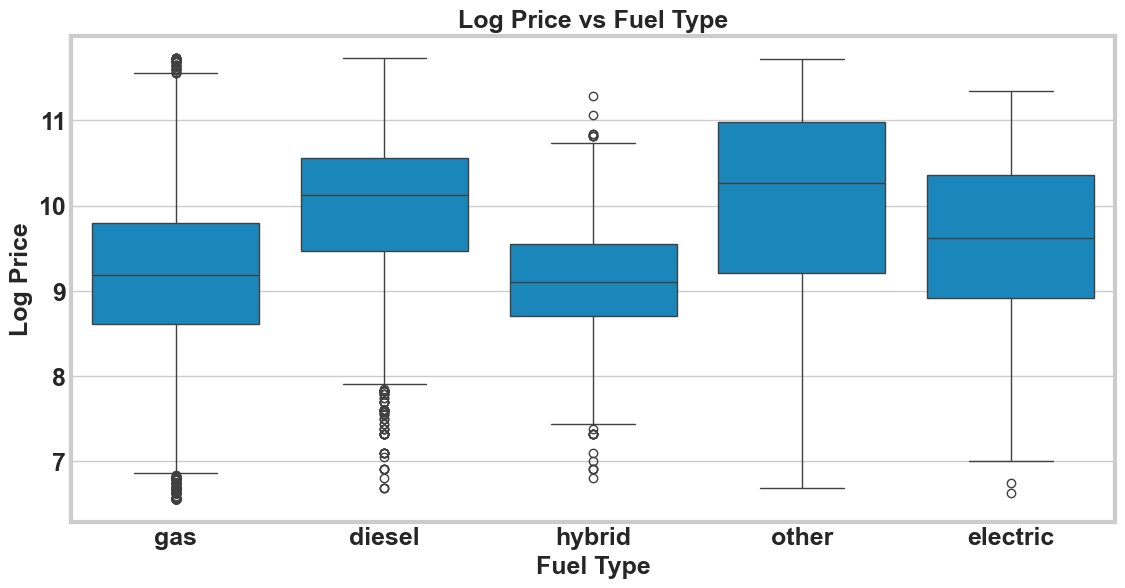

In [32]:
# Box plot: Price by Fuel Type after outlier removal
plt.figure(figsize=(12, 6))

sns.boxplot(x=cars1['fuel'], y=cars1['log_price'])
plt.title("Log Price vs Fuel Type", fontsize=18, fontweight = 'bold')
plt.xlabel("Fuel Type", fontsize=18, fontweight = 'bold')
plt.ylabel("Log Price", fontsize=18, fontweight = 'bold')
plt.xticks(fontsize=18, fontweight = 'bold')
plt.yticks(fontsize=18, fontweight = 'bold')

plt.show()


The above plot suggests that cars with  diesel fuel type and other are most expensive and  hybrid cars are less expensive.

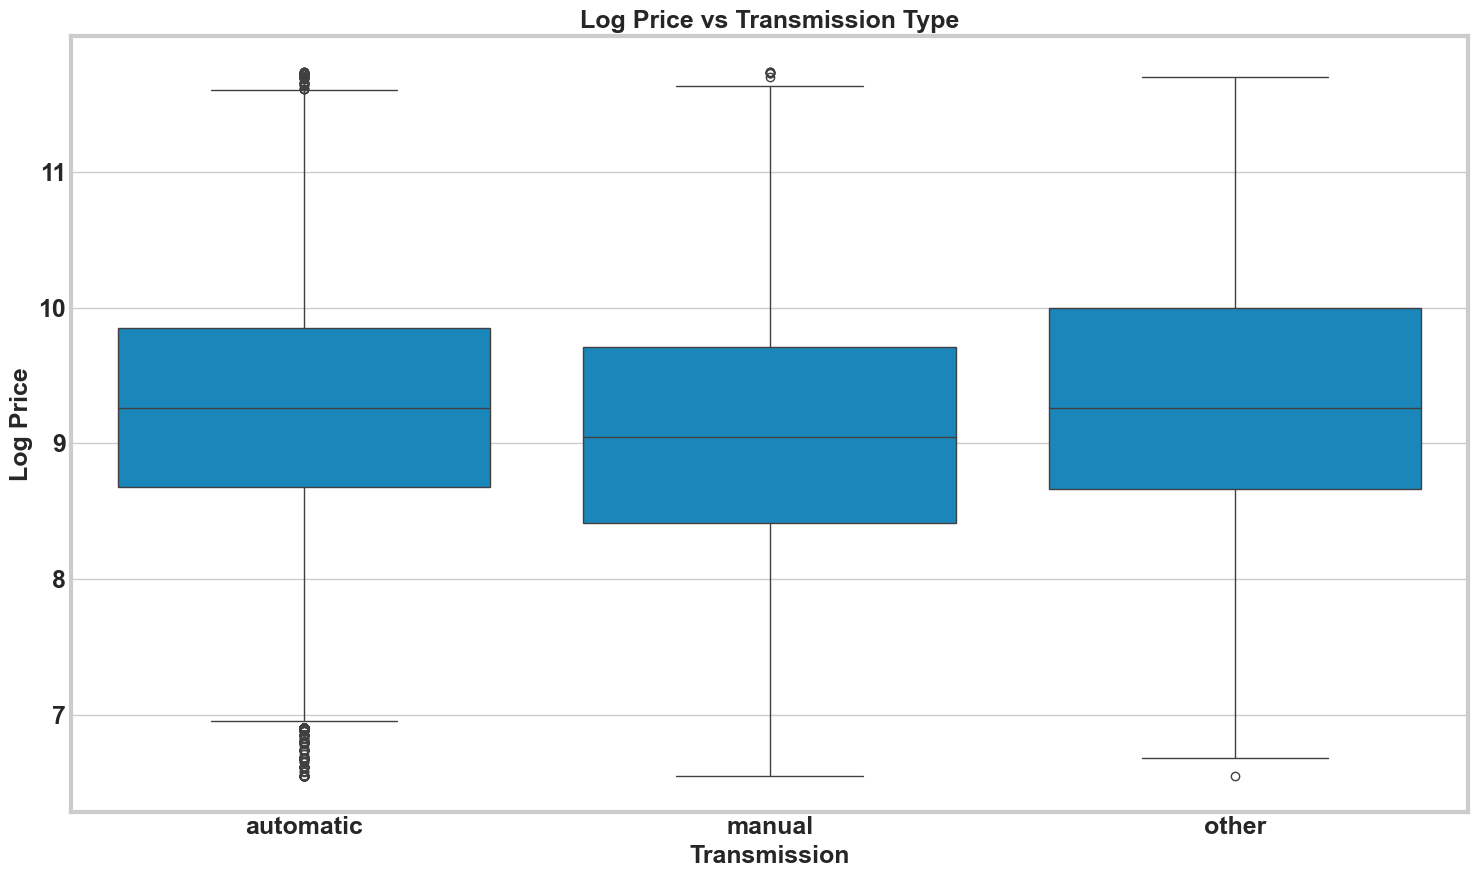

In [33]:
# Box plot: Price by Transmission after outlier removal

sns.boxplot(x=cars1['transmission'], y=cars1['log_price'])
plt.title("Log Price vs Transmission Type", fontsize=18, fontweight = 'bold')
plt.xlabel("Transmission", fontsize=18, fontweight = 'bold')
plt.ylabel("Log Price", fontsize=18, fontweight = 'bold')
plt.xticks(fontsize=18, fontweight = 'bold')
plt.yticks(fontsize=18, fontweight = 'bold')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The above plot suggests that the cars automatic transmission are expensive.

### Handling Categorical Values

In [34]:
# Replace cylinders column with number to convert it into int64 dtypes
cars1['cylinders'] = pd.to_numeric(cars1['cylinders'].replace({
    '6 cylinders': 6,
    '8 cylinders': 8,
    '4 cylinders': 4,
    '3 cylinders': 3,
    '10 cylinders': 10,
    '12 cylinders': 12,
    'other': 'NaN'  # Temporarily replace 'other' with NaN
}), errors='coerce').fillna(0).astype('int64')

In [35]:
# check for null values
cars1.isnull().sum()

price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
car_age         0
log_price       0
log_odometer    0
dtype: int64

In [36]:
# Drop rows Where Any of the Selected Columns Have Zeros
cars1 = cars1.loc[~(cars1[['price', 'cylinders', 'car_age', 'odometer', 'condition']].eq(0).any(axis=1))]
cars1.shape

(86718, 17)

#### 3. Correlation Heatmap (Numeric Variables)

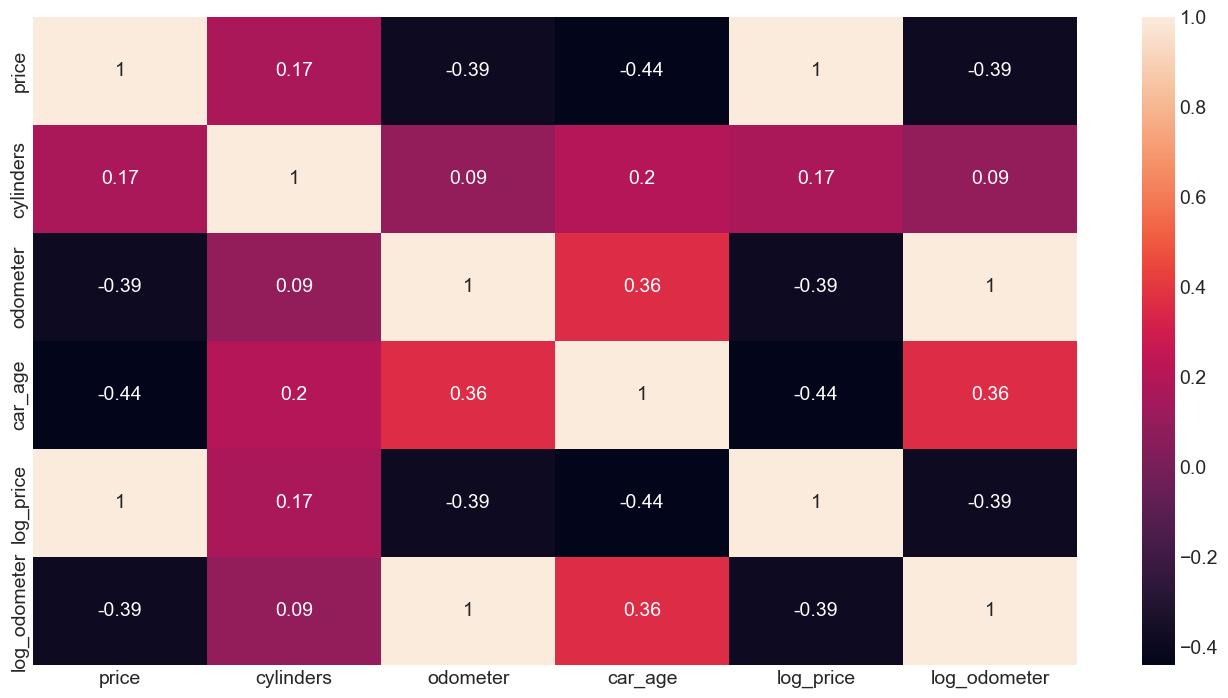

In [37]:
# corr_matrix = cars1[['odometer', 'car_age', 'log_price']].corr()

# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Correlation Heatmap", fontsize=14)
# plt.show()

corr = (cars1.corr(numeric_only = True, method = "kendall").round(2))

plt.figure(figsize= (15,8))
sns.heatmap(corr, annot= True);


In [38]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86718 entries, 0 to 87982
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         86718 non-null  int64  
 1   manufacturer  86718 non-null  object 
 2   model         86718 non-null  object 
 3   condition     86718 non-null  object 
 4   cylinders     86718 non-null  int64  
 5   fuel          86718 non-null  object 
 6   odometer      86718 non-null  float64
 7   title_status  86718 non-null  object 
 8   transmission  86718 non-null  object 
 9   drive         86718 non-null  object 
 10  size          86718 non-null  object 
 11  type          86718 non-null  object 
 12  paint_color   86718 non-null  object 
 13  state         86718 non-null  object 
 14  car_age       86718 non-null  float64
 15  log_price     86718 non-null  float64
 16  log_odometer  86718 non-null  float64
dtypes: float64(4), int64(2), object(11)
memory usage: 11.9+ MB


In [39]:
# Select rows where price is between 5000 and 50000
cars1 = cars1[(cars1['price'] >= 5000) & (cars1['price'] <= 50000)]
cars1.shape

(66857, 17)

In [40]:
# Select rows where the odometer is less than 150000
cars1 = cars1[cars1['odometer'] <= 150000]
cars1.shape

(53774, 17)

In [41]:
# Select rows where the car_age is less than 20 years
cars1 = cars1[(cars1['car_age'] <= 20)]
cars1.shape

(46654, 17)

In [42]:
# final preprosessed dataset for modeling
cars2 = cars1.drop(['log_price', 'log_odometer', 'model', 'state'], axis =1)
cars2.head()

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,car_age
0,15000,ford,excellent,6,gas,128000.0,clean,automatic,rwd,full-size,truck,black,12.0
2,14000,honda,excellent,6,gas,95000.0,clean,automatic,fwd,full-size,mini-van,silver,13.0
4,15000,dodge,excellent,8,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,grey,8.0
11,28000,acura,excellent,6,gas,55000.0,clean,automatic,fwd,compact,sedan,white,7.0
17,32000,chevrolet,good,8,diesel,109600.0,clean,automatic,4wd,full-size,truck,white,17.0


In [43]:
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46654 entries, 0 to 87978
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         46654 non-null  int64  
 1   manufacturer  46654 non-null  object 
 2   condition     46654 non-null  object 
 3   cylinders     46654 non-null  int64  
 4   fuel          46654 non-null  object 
 5   odometer      46654 non-null  float64
 6   title_status  46654 non-null  object 
 7   transmission  46654 non-null  object 
 8   drive         46654 non-null  object 
 9   size          46654 non-null  object 
 10  type          46654 non-null  object 
 11  paint_color   46654 non-null  object 
 12  car_age       46654 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 5.0+ MB


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [44]:
from sklearn import set_config
set_config(transform_output="pandas") # get the output in pandas df

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [45]:
cars2_encoded = pd.get_dummies(cars2, columns=['condition','title_status', 'transmission', 'fuel', 'drive', 'type', 'manufacturer', 'size', 'paint_color'], drop_first=True, dtype='int64')
cars2_encoded.head()

,price,cylinders,odometer,car_age,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,title_status_lien,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,15000,6,128000.0,12.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14000,6,95000.0,13.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,15000,8,90000.0,8.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
11,28000,6,55000.0,7.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17,32000,8,109600.0,17.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train/Test Data Splitting

In [46]:
X = cars2_encoded.drop(['price'], axis=1)
y = cars2_encoded[['price']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=42, test_size=0.2)

# Print the shape of the splits
print(f"Train features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Train features shape: (37323, 85)
Test features shape: (9331, 85)
Train labels shape: (37323, 1)
Test labels shape: (9331, 1)


In [48]:
scale = StandardScaler()

X_train_sc = scale.fit_transform(X_train)
X_test_sc = scale.fit_transform(X_test)

In [49]:
print(X_test_sc.isna().sum())

x0     0
x1     0
x2     0
x3     0
x4     0
      ..
x80    0
x81    0
x82    0
x83    0
x84    0
Length: 85, dtype: int64


In [50]:
# Average value of price 
y.mean().round(1) # average value of car price

price    17635.1
dtype: float64

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Helper functions

In [51]:
def error_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred):

    errors = {}

    # Errors for train data
    errors["Train_MAE"] = mean_absolute_error(y_train_true, y_train_pred)
    errors["Train_MSE"] = mean_squared_error(y_train_true, y_train_pred)
    errors["Train_RMSE"] = np.sqrt(errors["Train_MSE"])
    errors["Train_R2_Score"] = r2_score(y_train_true, y_train_pred)

    # Errors for test data
    errors["Test_MAE"] = mean_absolute_error(y_test_true, y_test_pred)
    errors["Test_MSE"] = mean_squared_error(y_test_true, y_test_pred)
    errors["Test_RMSE"] = np.sqrt(errors["Test_MSE"])
    errors["Test_R2_Score"] = r2_score(y_test_true, y_test_pred)

    return errors

model_evaluation = []

### Linear Regression Model


In [52]:
lr = LinearRegression()

lr.fit(X_train_sc, y_train)

lr_train_pred = lr.predict(X_train_sc)
lr_test_pred = lr.predict(X_test_sc)

error_lr = error_metrics(y_train, lr_train_pred, y_test, lr_test_pred)
error_lr

{'Train_MAE': 3836.5063156949213,
 'Train_MSE': 26858642.44962002,
 'Train_RMSE': 5182.532435944808,
 'Train_R2_Score': 0.7418221133815054,
 'Test_MAE': 3791.0401987533955,
 'Test_MSE': 26698201.888168305,
 'Test_RMSE': 5167.030277458059,
 'Test_R2_Score': 0.7470270048890659}

In [53]:
print("\nLinear Regression Coefficients:")
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0]  # Access coefficients from the fitted lr model
})
#print(coefficients.sort_values('Coefficient', ascending=False))
print("\nTop 10 Most Positive Coefficients (Linear Regression):")
print(coefficients.sort_values('Coefficient', ascending=False).head(10))

print("\nTop 10 Most Negative Coefficients (Linear Regression):")
print(coefficients.sort_values('Coefficient', ascending=True).head(10))


Linear Regression Coefficients:

Top 10 Most Positive Coefficients (Linear Regression):
                 Feature  Coefficient
0              cylinders  2795.884644
30            type_truck  1819.404707
71        size_full-size   950.867552
28           type_pickup   942.478120
72         size_mid-size   641.531120
13   transmission_manual   473.420814
67    manufacturer_tesla   468.949018
62  manufacturer_porsche   463.444826
22      type_convertible   389.284343
53    manufacturer_lexus   388.368654

Top 10 Most Negative Coefficients (Linear Regression):
                   Feature  Coefficient
2                  car_age -4780.733331
1                 odometer -2867.647919
16                fuel_gas -2509.477633
17             fuel_hybrid -1165.167968
19               drive_fwd -1121.395377
60     manufacturer_nissan -1102.273356
43       manufacturer_ford -1082.619655
29              type_sedan  -977.544045
39  manufacturer_chevrolet  -905.628497
11    title_status_rebuilt  -839.9512

In [54]:
error_lr['Model Name']='Linear Regression'
error_lr
model_evaluation = (pd.DataFrame([error_lr]))
model_evaluation

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,3836.506316,2.685864e+07,5182.532436,0.741822,3791.040199,2.669820e+07,5167.030277,0.747027,Linear Regression


### Lasso Regression Model

In [55]:
lasso_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', Lasso())
])

lasso_pipe
param_grid = {
    'model__alpha': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(lasso_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(best_model)

Pipeline(steps=[('scale', StandardScaler()), ('model', Lasso(alpha=0.1))])


### Lasso model hypertunning

In [56]:
lasso = Lasso(alpha=0.1)

lasso.fit(X_train_sc, y_train)

ls_train_pred = lasso.predict(X_train_sc)
ls_test_pred = lasso.predict(X_test_sc)

error_lasso = error_metrics(y_train, ls_train_pred, y_test, ls_test_pred)
error_lasso['Model Name'] = 'Lasso'
error_lasso

{'Train_MAE': 3836.4869251610953,
 'Train_MSE': 26858652.941513192,
 'Train_RMSE': 5182.53344818084,
 'Train_R2_Score': 0.7418220125285002,
 'Test_MAE': 3791.042837304291,
 'Test_MSE': 26697903.325721677,
 'Test_RMSE': 5167.001386270539,
 'Test_R2_Score': 0.7470298338524796,
 'Model Name': 'Lasso'}

In [57]:
print("\nTop 10 Most Positive Coefficients (Lasso Regression):")
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
print(lasso_coefficients.sort_values('Coefficient', ascending=False).head(10))

print("\nTop 10 Most Negative Coefficients (Lasso Regression):")
print(lasso_coefficients.sort_values('Coefficient', ascending=True).head(10))



Top 10 Most Positive Coefficients (Lasso Regression):
                 Feature  Coefficient
0              cylinders  2796.098555
30            type_truck  1818.988832
71        size_full-size   950.261555
28           type_pickup   942.097629
72         size_mid-size   641.049746
13   transmission_manual   473.229371
67    manufacturer_tesla   469.704925
62  manufacturer_porsche   464.981596
53    manufacturer_lexus   392.389867
22      type_convertible   389.018562

Top 10 Most Negative Coefficients (Lasso Regression):
                   Feature  Coefficient
2                  car_age -4780.512977
1                 odometer -2867.602043
16                fuel_gas -2509.104941
17             fuel_hybrid -1164.894918
19               drive_fwd -1121.289774
60     manufacturer_nissan -1094.953319
43       manufacturer_ford -1069.982876
29              type_sedan  -977.620192
39  manufacturer_chevrolet  -895.308829
11    title_status_rebuilt  -839.819731


In [58]:
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_lasso]))], ignore_index=True)
model_evaluation

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,3836.506316,2.685864e+07,5182.532436,0.741822,3791.040199,2.669820e+07,5167.030277,0.747027,Linear Regression
1,3836.486925,2.685865e+07,5182.533448,0.741822,3791.042837,2.669790e+07,5167.001386,0.747030,Lasso


### Ridge Regression Model

In [59]:
rr_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', Ridge())
])

rr_pipe

param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(rr_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_model_ridge = grid_search.best_estimator_
print(best_model_ridge)

Pipeline(steps=[('scale', StandardScaler()), ('model', Ridge(alpha=10))])


In [60]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

rr_train_pred = ridge.predict(X_train)
rr_test_pred = ridge.predict(X_test)

error_ridge = error_metrics(y_train, rr_train_pred, y_test, rr_test_pred)
error_ridge['Model Name'] = 'Ridge'
error_ridge

{'Train_MAE': 3842.4796427165797,
 'Train_MSE': 26909959.377014518,
 'Train_RMSE': 5187.48102425585,
 'Train_R2_Score': 0.7413288309720418,
 'Test_MAE': 3804.4350910800813,
 'Test_MSE': 26650594.581297625,
 'Test_RMSE': 5162.421387420599,
 'Test_R2_Score': 0.7474780975528599,
 'Model Name': 'Ridge'}

In [61]:
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_ridge]))], ignore_index=True)
model_evaluation

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,3836.506316,2.685864e+07,5182.532436,0.741822,3791.040199,2.669820e+07,5167.030277,0.747027,Linear Regression
1,3836.486925,2.685865e+07,5182.533448,0.741822,3791.042837,2.669790e+07,5167.001386,0.747030,Lasso
2,3842.479643,2.690996e+07,5187.481024,0.741329,3804.435091,2.665059e+07,5162.421387,0.747478,Ridge


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Interpretation of Evaluation Metrics

In [62]:
print("\nModel Evaluation Metrics:")
print(model_evaluation)


Model Evaluation Metrics:
     Train_MAE     Train_MSE   Train_RMSE  Train_R2_Score     Test_MAE  \
0  3836.506316  2.685864e+07  5182.532436        0.741822  3791.040199   
1  3836.486925  2.685865e+07  5182.533448        0.741822  3791.042837   
2  3842.479643  2.690996e+07  5187.481024        0.741329  3804.435091   

       Test_MSE    Test_RMSE  Test_R2_Score         Model Name  
0  2.669820e+07  5167.030277       0.747027  Linear Regression  
1  2.669790e+07  5167.001386       0.747030              Lasso  
2  2.665059e+07  5162.421387       0.747478              Ridge  


### **Interpretation of the metrics used above:**

#### Mean Absolute Error (MAE):
   - Represents the average absolute difference between the predicted and actual prices.
   - Provides an understanding of the average magnitude of prediction errors in the original units.
   - A lower MAE indicates better prediction accuracy.

#### Mean Squared Error (MSE):
   - Calculates the average squared difference between predicted and actual prices.
   - More sensitive to large errors than MAE because of the squaring operation.
   - Large errors have a disproportionately larger impact on MSE.

#### Root Mean Squared Error (RMSE):
   - The square root of MSE, bringing the error metric back to the same units as the target variable.
   - Provides a more interpretable measure of error magnitude compared to MSE.

#### R² Score (Coefficient of Determination):
   - Measures the proportion of variance in the target variable (price) explained by the model.
   - A higher R² (closer to 1) indicates a better fit, meaning the model explains more of the price variation.
   - A low R² suggests the model doesn't capture much of the price variability.  


#### Comparing Models:
Compare the values of R², MAE, RMSE across different models to determine which model performs best.
Generally, we want to aim for a high R², and low MAE and RMSE values.

In [63]:
# Example of how to access and print information on a per-model basis:
print("\nLinear Regression Metrics:")
print(model_evaluation[model_evaluation['Model Name'] == 'Linear Regression'])
#print(f"R^2: {error_lr['Test_R2_Score']:.3f}, MAE: {error_lr['Test_MAE']:.2f}")
print("\nLasso Regression Metrics:")
print(model_evaluation[model_evaluation['Model Name'] == 'Lasso'])

print("\nRidge Regression Metrics:")
print(model_evaluation[model_evaluation['Model Name'] == 'Ridge'])




Linear Regression Metrics:
     Train_MAE     Train_MSE   Train_RMSE  Train_R2_Score     Test_MAE  \
0  3836.506316  2.685864e+07  5182.532436        0.741822  3791.040199   

       Test_MSE    Test_RMSE  Test_R2_Score         Model Name  
0  2.669820e+07  5167.030277       0.747027  Linear Regression  

Lasso Regression Metrics:
     Train_MAE     Train_MSE   Train_RMSE  Train_R2_Score     Test_MAE  \
1  3836.486925  2.685865e+07  5182.533448        0.741822  3791.042837   

       Test_MSE    Test_RMSE  Test_R2_Score Model Name  
1  2.669790e+07  5167.001386        0.74703      Lasso  

Ridge Regression Metrics:
     Train_MAE     Train_MSE   Train_RMSE  Train_R2_Score     Test_MAE  \
2  3842.479643  2.690996e+07  5187.481024        0.741329  3804.435091   

       Test_MSE    Test_RMSE  Test_R2_Score Model Name  
2  2.665059e+07  5162.421387       0.747478      Ridge  


In [64]:
# Clearly identify the primary evaluation metric:
primary_metric = 'Test_R2_Score'  # Choose the most important metric for your task
print(f"\nPrimary Evaluation Metric: {primary_metric}")

# Analyze model performance based on the primary metric
best_model_name = model_evaluation.loc[model_evaluation[primary_metric].idxmax(), 'Model Name']
best_model_score = model_evaluation[primary_metric].max()
print(f"\nBest Model based on {primary_metric}: {best_model_name} ({best_model_score:.4f})")




Primary Evaluation Metric: Test_R2_Score

Best Model based on Test_R2_Score: Ridge (0.7475)


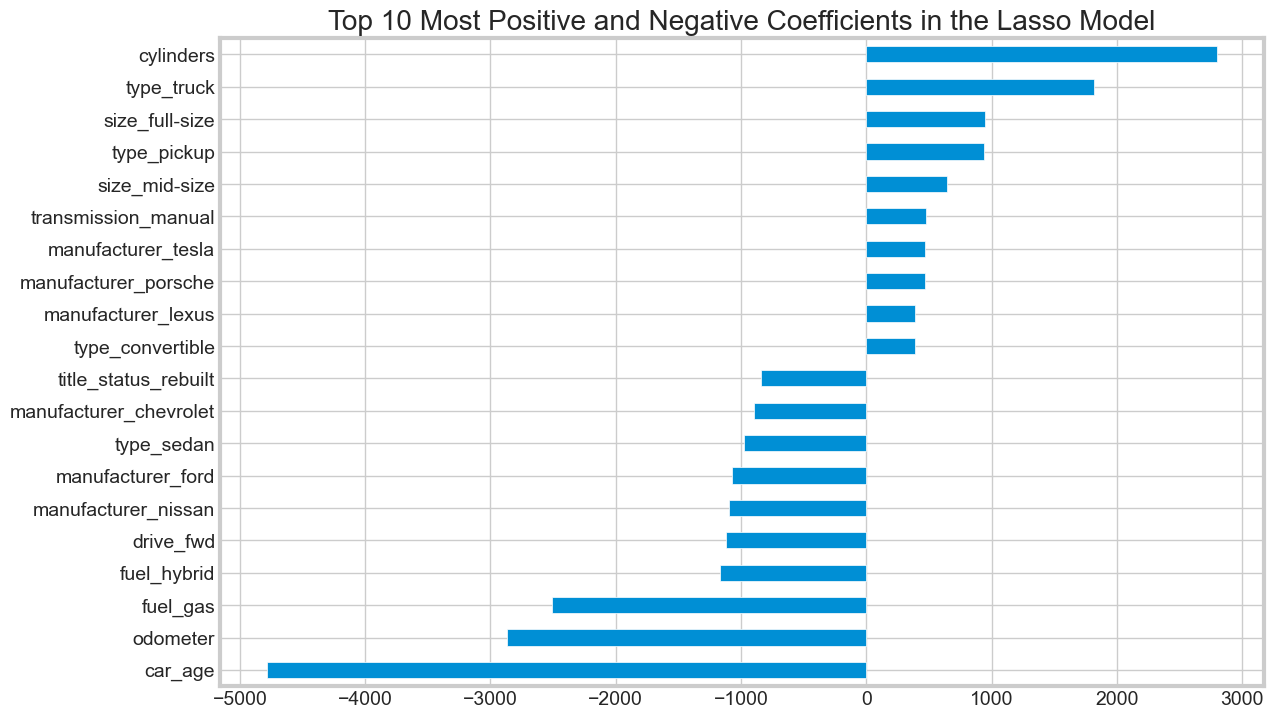

In [65]:
# provide model performance analysis and prediction for what factors drive the car prices
# Analyze feature importance (example using Lasso coefficients)
# Since Lasso shrinks coefficients of less important features towards zero
# the non-zero coefficients represent the important ones
coef = pd.Series(lasso.coef_, index=X.columns)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])
plt.figure(figsize=(12, 8))
imp_coef.plot(kind="barh")
plt.title("Top 10 Most Positive and Negative Coefficients in the Lasso Model")
plt.show()


# Model Performance Analysis:

Based on the R2 scores, here's a comparison of the models:

Linear Regression, Lasso, and Ridge: These linear models perform similarly, with R2 scores around 90%. While they might be simpler to interpret.


# Model Performance Analysis. 

#### **1. Feature Importance Analysis**
The coefficient values from Linear and Lasso Regression provide insights into which features have the most significant impact on vehicle prices.

- **Top Positive Features:**
  - **Cylinders**: Higher cylinder count increases price significantly.
  - **Vehicle Type (Truck, Pickup, Full-size, Mid-size, Convertible)**: Larger and more utility-oriented vehicles tend to have higher prices.
  - **Transmission (Manual)**: Slight positive impact, likely due to performance preference or rarity.
  - **Luxury & High-Performance Manufacturers (Tesla, Porsche, Lexus)**: Brand prestige significantly increases the price.

- **Top Negative Features:**
  - **Car Age & Odometer**: Older vehicles and higher mileage significantly reduce the price.
  - **Fuel Type (Gas, Hybrid)**: Gasoline and hybrid cars are associated with lower prices, potentially due to the high market dominance of gas-powered vehicles and depreciation effects.
  - **Drive Type (FWD)**: Front-wheel drive cars tend to be lower-priced compared to AWD or RWD options.
  - **Manufacturers (Nissan, Ford, Chevrolet)**: Mass-market brands generally have lower price points.
  - **Title Status (Rebuilt)**: Rebuilt titles significantly lower the price due to concerns over previous damage.

#### **2. Model Comparison: Linear Regression vs. Lasso Regression**
- **Consistency of Feature Importance:** The rankings of feature importance remain highly consistent between Linear and Lasso Regression. This suggests that regularization (Lasso) does not significantly alter feature influence, indicating a well-conditioned dataset.
- **Coefficient Shrinkage:** Lasso Regression applies L1 regularization, which can shrink less important coefficients to zero. However, in this case, the differences are minimal, meaning that most features contribute meaningfully.

#### **3. Model Performance Interpretation**
- **Key Insights:**
  - Car age and odometer reading have the strongest negative impact, reinforcing the depreciation factor in vehicle pricing.
  - Vehicle type and luxury brands are the biggest price boosters, which aligns with consumer demand and perceived value.
  - Lasso Regression small coefficient adjustments indicate minimal multicollinearity, suggesting that the feature set is well-selected.

- **Potential Improvements:**
  - If prediction accuracy is not high, consider using non-linear models like Random Forests or Gradient Boosting, which can capture interactions better.
  - Check for **multicollinearity** using VIF (Variance Inflation Factor) to ensure some highly correlated features are not distorting the model.
  - Feature engineering, such as grouping similar manufacturers or adding interaction terms (e.g., age and odometer), could improve model interpretability.

#### **4. Business Implications**
- **Pricing Strategy:** Dealers and sellers should prioritize marketing larger vehicles (trucks, full-size sedans) and premium brands to command higher prices.
- **Depreciation Insights:** Buyers should expect significant depreciation for high-mileage or older vehicles, while sellers should price accordingly.
- **Fuel Type Trends:** Hybrid and gas cars are lower in value, suggesting an opportunity for electric vehicles to gain traction in price retention.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## Used Car Pricing Analysis Report

#### **Prepared for Used Car Dealers**

#### **1. Goals**
The objective of this analysis is to provide data-driven insights to help used car dealers optimize their inventory pricing. By leveraging Linear, Ridge and Lasso Regression models, we have identified the key factors that influence vehicle prices. Understanding these factors can help dealers make informed decisions when purchasing, pricing, and marketing used vehicles.

#### **2. Key Findings**
##### **Top Factors That Increase Car Prices**
The following features have the most significant positive impact on used car prices:
1. **Cylinders** (+$2,796 per additional cylinder): Vehicles with more cylinders tend to be larger and more powerful, commanding higher prices.
2. **Vehicle Type**:
   - **Trucks** (+$1,819) and **Pickups** (+$942) are in high demand and fetch premium prices.
   - **Full-size and Mid-size vehicles** also contribute positively to pricing.
3. **Transmission Type**:
   - **Manual Transmission** (+$473) increases value, likely due to performance and demand.
4. **Luxury & High-Performance Brands**:
   - **Tesla** (+$469), **Porsche** (+$464), and **Lexus** (+$388) have significantly higher resale values.
5. **Convertibles** (+$389): Due to seasonal demand and niche buyer interest, convertibles hold higher value.

##### **Top Factors That Decrease Car Prices**
The following features contribute to lower resale values:
1. **Car Age** (-$4,780 per year): Older vehicles depreciate significantly.
2. **Odometer (Mileage)** (-$2,867 per additional 10,000 miles): High mileage reduces value due to wear and tear.
3. **Fuel Type**:
   - **Gasoline Cars** (-$2,509) and **Hybrid Cars** (-$1,165) have lower resale values, possibly due to evolving market trends.
4. **Drive Type**:
   - **FWD (Front-Wheel Drive)** (-$1,121) is generally priced lower than AWD or RWD vehicles.
5. **Mass-Market Brands**:
   - **Nissan (-$1,094), Ford (-$1,070), and Chevrolet (-$895)** show lower resale values compared to luxury brands.
6. **Rebuilt Title Status** (-$840): Vehicles with prior damage history are priced significantly lower.

---

#### **3. Business Implications for Used Car Dealers**
##### **Inventory Optimization**
- **Prioritize stocking trucks, pickups, and full-size vehicles**, as they consistently fetch higher prices.
- **Luxury brands (Tesla, Porsche, Lexus) hold strong resale value**, making them worthwhile investments.
- **Manual transmission vehicles may appeal to niche buyers**, potentially leading to better margins.

##### **Pricing Strategy**
- Older, high-mileage vehicles should be priced competitively to attract buyers.
- Rebuilt-title cars require additional incentives or warranties to improve sales potential.
- Consider seasonal trends when pricing convertibles and hybrid vehicles.

#### **Market Trends & Adaptation**
- Fuel type preferences are shifting; consider stocking more electric vehicles as the market evolves.
- AWD and RWD vehicles may be preferred over FWD models in certain regions.

---

#### **4. Conclusion & Next Steps**
This report provides valuable insights for used car dealers looking to maximize profitability. By leveraging these data-driven findings, dealers can refine their inventory selection, pricing strategies, and marketing efforts.

#### **Recommended Actions:**
1. **Adjust pricing models** based on key influencing factors.
2. **Optimize inventory** by selecting high-value vehicles (trucks, luxury brands, manual transmission models).
3. **Monitor market trends** to adapt to changing buyer preferences (e.g., increasing demand for EVs).
4. **Consider additional machine learning models** (e.g., Random Forest, XGBoost) to enhance prediction accuracy.

